<a href="https://colab.research.google.com/github/move7/Statistics-/blob/master/PCA_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA Algorithme

**`L'ACP`** (Analyse en Composantes, Principal Component Analysis), a pour but de réduire la dimensionnalité des données tout en conservant un maximum d'informations (variance).

Préparer l'environnement et les données

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Matrice de données (5 samples x 3 features)
X = \begin{bmatrix} 2 & 2 & 3 \\ 3 & 1 & 2 \\ 1 & 0 & 3 \\ 2 & 1 & 4 \\ 2 & 1 & 2 \end{bmatrix}

In [7]:
X = np.array([
    [2, 2, 3],
    [3, 1, 2],
    [1, 0, 3],
    [2, 1, 4],
    [2, 1, 2]
])
print("Matrix (X):\n", X)

Matrix (X):
 [[2 2 3]
 [3 1 2]
 [1 0 3]
 [2 1 4]
 [2 1 2]]


##Calcul de la moyenne, la variance et l'écart type de chaque colonne
- Moyenne : $\bar{X}_i = \frac{\sum_i X_{i1}}{n}$
- Variance : $\mathrm{Var}(X_i) = \frac{1}{n - 1} \sum_{i=1}^n (X_{ij} - \bar{X}_j)^2$
- Écart type :  $\sigma_i = \sqrt{\mathrm{Var}(X_i)}$$

- Colonne 1:
   -  $\bar{X}_1 = \frac{2 + 3 + 1 + 2 + 2}{5} = \frac{10}{5} = 2$
   - $\mathrm{Var}(X_1) =\frac{(2 - 2)^2 + (3 - 2)^2 + (1 - 2)^2 + (2 - 2)^2 + (2 - 2)^2}{4} = \frac{2}{4} = 0.5$
    - $\sigma_1 = \sqrt{0.5}\approx0.7071$
    

-  Colonne 2:
   -  $\bar{X}_2 = \frac{2 + 1 + 0 + 1 + 1 }{5} = \frac{5}{5} = 1$
   - $\mathrm{Var}(X_2) = \frac{(2 - 1)^2 + (1 - 1)^2 + (0 - 1)^2 + (1 - 1)^2 + (1 - 1)^2}{4} = \frac{2}{4} = 0.5$
  - $\sigma_2 = \sqrt{0.5}\approx0.7071$

-  Colonne 3:
   -  $\bar{X}_3 = \frac{3 + 2 + 3 + 4 + 2 }{5} = \frac{14}{5} = 2.8$
   - $\mathrm{Var}(X_3) = \frac{(3 - 2.8)^2 + (2 - 2.8)^2 + (3 - 2.8)^2 + (4 - 2.8)^2 + (2 - 2.8)^2}{4} = 0.7$
  - $\sigma_3 = \sqrt{0.7}\approx0.8367$


In [9]:

means = X.mean(axis=0)
variances = np.var(X, axis=0, ddof=1)
stds = np.std(X, axis=0, ddof=1)  # ddof=0 pour diviser par n et pas n-1
print(" means       : ",means)
print(" variances   : ",variances)
print(" stds       : ",stds)

 means       :  [2.  1.  2.8]
 variances   :  [0.5 0.5 0.7]
 stds       :  [0.70710678 0.70710678 0.83666003]


### Matrice centrée & Matrice standardisée

- Matrice centrée :$X_{centré} = X - \bar{X}$
$$
X_{centré} = \begin{bmatrix}
    2-2 & 2-1 & 3-2.8 \\
    3-2 & 1-1 & 2-2.8 \\
    1-2 & 0-1 & 3-2.8 \\
    2-2 & 1-1 & 4-2.8 \\
    2-2 & 1-1 & 2-2.8
\end{bmatrix}
$$
$$
X_{centré} = \begin{bmatrix}
    0 & 1 & 0.2 \\
    1 & 0 & -0.8 \\
    -1 & -1 & 0.2 \\
    0 & 0 & 1.2 \\
    0 & 0 & -0.8
\end{bmatrix}
$$


- Matrice standardisée :$X_{standardisé} = \frac{X - \bar{X}}{\sigma}= \frac{X_{centré}}{\sigma}$
$$
X_{standardisé} = \begin{bmatrix}
    0 & \frac{1}{\sqrt{0.5}} & \frac{0.2}{\sqrt{0.7}} \\
    \frac{1}{\sqrt{0.5}} & 0 & \frac{-0.8}{\sqrt{0.7}} \\
    \frac{-1}{\sqrt{0.5}} & \frac{-1}{\sqrt{0.5}} & \frac{0.2}{\sqrt{0.7}} \\
    0 & 0 & \frac{1.2}{\sqrt{0.7}} \\
    0 & 0 & \frac{-0.8}{\sqrt{0.7}}
\end{bmatrix}=\begin{bmatrix}
0 & 1.414 & 0.240 \\
1.414 & 0 & -0.960 \\
-1.414 & -1.414 & 0.240 \\
0 & 0 & 1.430 \\
0 & 0 & -0.960 \\
\end{bmatrix}
$$


In [10]:
# Matrice centrée
X_centre = X - means

# Matrice standardisée (centrée-réduite)
X_standardise = X_centre / stds

print("Matrice centrée :\n", X_centre)
print("Matrice standardisée :\n", X_standardise)

Matrice centrée :
 [[ 0.   1.   0.2]
 [ 1.   0.  -0.8]
 [-1.  -1.   0.2]
 [ 0.   0.   1.2]
 [ 0.   0.  -0.8]]
Matrice standardisée :
 [[ 0.          1.41421356  0.23904572]
 [ 1.41421356  0.         -0.95618289]
 [-1.41421356 -1.41421356  0.23904572]
 [ 0.          0.          1.43427433]
 [ 0.          0.         -0.95618289]]


##Compute the matrix R :
$R = \frac{1}{n-1} X_{\text{standardisé}}^T X_{\text{standardisé}}$

$$
R =  \frac{1}{4} \begin{bmatrix}
0 & 1.414 & -1.414 & 0 & 0 \\
1.414 & 0 & -1.414 & 0 & 0 \\
0.240 & -0.960 & 0.240 & 1.430 & -0.960 \\
\end{bmatrix}
\begin{bmatrix}
0 & 1.414 & 0.240 \\
1.414 & 0 & -0.960 \\
-1.414 & -1.414 & 0.240 \\
0 & 0 & 1.430 \\
0 & 0 & -0.960 \\
\end{bmatrix}=\frac{1}{4}\begin{bmatrix}
4.000 & 2.000 & -1.697 \\
2.000 & 4.000 & 0.000 \\
-1.697 & 0.000 & 4.005 \\
\end{bmatrix}=\begin{bmatrix}
1 & 0.5 & -0.42 \\
0.5 & 1 & 0 \\
-0.42 & 0 & 1 \\
\end{bmatrix}
$$




In [11]:
# Matrice corrélation
R = (1/4) * (X_standardise.T @ X_standardise)

print("\nMatrice corrélation :\n", np.round(R, 3))



Matrice corrélation :
 [[ 1.     0.5   -0.423]
 [ 0.5    1.    -0.   ]
 [-0.423 -0.     1.   ]]


## Les valeurs propres
- Cherchons les valeurs propres $(\lambda)$ tel que :$\det(R - \lambda I) = 0$


$$
\det(R - \lambda I) =
\begin{vmatrix}
1 - \lambda & 0.5 & -0.42 \\
0.5 & 1 - \lambda & 0 \\
-0.42 & 0 & 1 - \lambda
\end{vmatrix}=
(1 - \lambda)
\begin{vmatrix}
1 - \lambda & 0 \\
0 & 1 - \lambda
\end{vmatrix}
- 0.5
\begin{vmatrix}
0.5 & 0 \\
-0.42 & 1 - \lambda
\end{vmatrix}
- 0.42
\begin{vmatrix}
0.5 & 1 - \lambda \\
-0.42 & 0
\end{vmatrix}
$$



D'où :

$$
\det(R - \lambda I) = (1 - \lambda)^3 - 0.25 (1 - \lambda) - 0.1764 (1 - \lambda) = (1 - \lambda) \left[(1 - \lambda)^2 - 0.4264\right]
$$

On résout donc :
$$
(1 - \lambda) = 0 \quad \text{ou} \quad (1 - \lambda)^2 = 0.4264
$$

Les solutions sont :

$$
\lambda_1 = 1, \quad \lambda_2 = 1 - \sqrt{0.4264} \approx 0.3463, \quad \lambda_3 = 1 + \sqrt{0.4264} \approx 1.6537
$$


In [12]:
eigenvalues, _ = np.linalg.eig(R)
print(np.round(eigenvalues, 4))

[1.6547 0.3453 1.    ]


##Les vecteurs propres:

Pour chaque valeur propre $(\lambda)$, le vecteur propre $(\mathbf{v})$ non nul vérifie :$(R - \lambda I) \mathbf{v} = \mathbf{0}$

- Pour $(\lambda_1 = 1.6537)$

$$
\left(
\begin{bmatrix}
1 & 0.5 & -0.42 \\
0.5 & 1 & 0 \\
-0.42 & 0 & 1
\end{bmatrix}
- 1.6537
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\right)
\mathbf{v} = \mathbf{0}
$$
$$
\Rightarrow
\begin{bmatrix}
1 - 1.6537 & 0.5 & -0.42 \\
0.5 & 1 - 1.6537 & 0 \\
-0.42 & 0 & 1 - 1.6537
\end{bmatrix}
\mathbf{v} = \mathbf{0}
\quad
\Rightarrow \quad
\begin{bmatrix}
-0.6537 & 0.5 & -0.42 \\
0.5 & -0.6537 & 0 \\
-0.42 & 0 & -0.6537
\end{bmatrix}
\mathbf{v} = \mathbf{0}
$$
$$
\Rightarrow \quad
\begin{cases}
-0.6537 v_1 + 0.5 v_2 - 0.42 v_3 = 0 \\
0.5 v_1 - 0.6537 v_2 = 0 \\
-0.42 v_1 - 0.6537 v_3 = 0
\end{cases}
$$
$$
\Rightarrow \quad
\begin{cases}
-0.6537 v_1 + 0.5 v_2 - 0.42 v_3 = 0 \\
 v_2 = \dfrac{0.6537}{0.5} v_1\\
 v_3 =\dfrac{0.6537}{-0.42}v_1
\end{cases}
$$
$$
\Rightarrow
\begin{cases}
v_2 = \dfrac{0.5}{0.6537} v_1 \approx 0.7647 v_1 \\
v_3 = \dfrac{-0.42}{0.6537} v_1 \approx -0.6424 v_1
\end{cases}
$$

  - Vecteur propre associé à $ \lambda_1 $

$$
\mathbf{v}_1 = v_1 \cdot
\begin{bmatrix}
1 \\
0.7647 \\
-0.6424
\end{bmatrix}
\quad
$$

 - On peut le normaliser :
  - Sa norme: $$\|\mathbf{v}_1\| = \sqrt{1^2 + 0.7647^2 + (-0.6424)^2} = \sqrt{1.9975} \approx 1.4133$$
  - Le vecteur propre normalisé :
$$
\mathbf{u}_1 = \frac{1}{1.4133} \cdot
\begin{bmatrix}
1 \\
0.7647 \\
-0.6424
\end{bmatrix}
\approx
\begin{bmatrix}
0.7073 \\
0.5408 \\
-0.4544
\end{bmatrix}
$$
- Pour $(\lambda_2 = 0.3463)$
$$
\mathbf{v}_2 =
\begin{bmatrix}
1 \\
-0.7071 \\
0.7071
\end{bmatrix}
$$

$$
\|\mathbf{v}_2\| = \sqrt{1^2 + (-0.7071)^2 + (0.7071)^2} = \sqrt{1 + 0.5 + 0.5} = \sqrt{2} \approx 1.4142
$$

Vecteur normalisé :
$$
\mathbf{u}_2 = \frac{1}{1.4142}
\begin{bmatrix}
1 \\
-0.7071 \\
0.7071
\end{bmatrix}
\approx
\begin{bmatrix}
0.7071 \\
-0.5 \\
0.5
\end{bmatrix}
$$

- Pour $(\lambda_3 = 1.6537)$


$$
\|\mathbf{v}_3\| = \sqrt{1^2 + (-0.5)^2 + (-0.5)^2} = \sqrt{1 + 0.25 + 0.25} = \sqrt{1.5} \approx 1.2247
$$

$$
\mathbf{u}_3 = \frac{1}{1.2247}
\begin{bmatrix}
1 \\
-0.5 \\
-0.5
\end{bmatrix}
\approx
\begin{bmatrix}
0.8165 \\
-0.4082 \\
-0.4082
\end{bmatrix}
$$


In [13]:
#valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(R)

# Arrondi
eigenvectors_rounded = np.round(eigenvectors, 4)

print("\nVecteurs propres (chaque colonne correspond à un vecteur propre) :")
print(eigenvectors_rounded)


Vecteurs propres (chaque colonne correspond à un vecteur propre) :
[[ 0.7071  0.7071  0.    ]
 [ 0.5401 -0.5401  0.6455]
 [-0.4564  0.4564  0.7638]]


#### Choisir 2 composantes principales

In [14]:
N = 2
composantes_principales = eigenvectors[:, :N]
print(f"\nTop {N} composantes principales:\n", composantes_principales)


Top 2 composantes principales:
 [[ 0.70710678  0.70710678]
 [ 0.54006172 -0.54006172]
 [-0.45643546  0.45643546]]


### Projeter les données centrées sur les nouvelles composantes principales

In [15]:
X_projected = X_centre @ composantes_principales
print("\nProjeter les données sur les nouvelles composantes principales:\n", X_projected)


Projeter les données sur les nouvelles composantes principales:
 [[ 0.44877463 -0.44877463]
 [ 1.07225515  0.34195841]
 [-1.3384556  -0.07575796]
 [-0.54772256  0.54772256]
 [ 0.36514837 -0.36514837]]


## Tracer les points

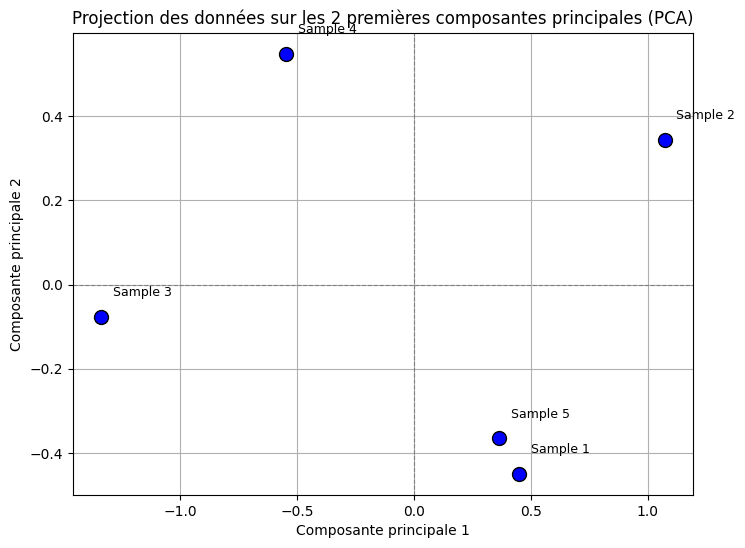

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_projected[:,0], X_projected[:,1], color='blue', edgecolor='k', s=100)

for i, (x, y) in enumerate(X_projected):
    plt.text(x + 0.05, y + 0.05, f"Sample {i+1}", fontsize=9)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des données sur les 2 premières composantes principales (PCA)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.show()